In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
emicron = pd.read_csv("/Users/henriquerodrigues/Desktop/LSE/PP422/Project/Data/emicron_index.csv")

In [4]:
department = {
    5: "Antioquia",
    8: "Atlántico",
    11: "Bogotá, D. C.",
    13: "Bolívar",
    15: "Boyacá",
    17: "Caldas",
    18: "Caquetá",
    19: "Cauca",
    20: "Cesar",
    23: "Córdoba",
    25: "Cundinamarca",
    27: "Chocó",
    41: "Huila",
    44: "La Guajira",
    47: "Magdalena",
    50: "Meta",
    52: "Nariño",
    54: "Norte De Santander",
    63: "Quindío",
    66: "Risaralda",
    68: "Santander",
    70: "Sucre",
    73: "Tolima",
    76: "Valle Del Cauca",
    88: "Archipiélago de San Andrés, Providencia y Santa Catalina"}

In [6]:
emicron['dept_name'] = emicron['COD_DEPTO'].map(department)

In [64]:
weighted_total_counts_by_dept = emicron.groupby("dept_name")["F_EXP"].sum()

# Calculate the weighted number of males for each department
weighted_male_counts_by_dept = emicron[emicron['P35'] == 1].groupby("dept_name")['F_EXP'].sum()

# Calculate the percentage of males for each department with expansion factors
percentage_males_by_dept = (weighted_male_counts_by_dept / weighted_total_counts_by_dept) * 100

In [65]:
percentage_males_by_dept

dept_name
Antioquia                                                   67.245560
Archipiélago de San Andrés, Providencia y Santa Catalina    76.756600
Atlántico                                                   60.535369
Bogotá, D. C.                                               66.290751
Bolívar                                                     70.144772
Boyacá                                                      63.499275
Caldas                                                      67.302014
Caquetá                                                     68.730325
Cauca                                                       70.577418
Cesar                                                       71.661104
Chocó                                                       69.606948
Cundinamarca                                                62.513800
Córdoba                                                     68.297187
Huila                                                       72.045119
La Guajira

In [230]:
percentage_males_by_dept.to_csv("/Users/henriquerodrigues/Downloads/males.csv")

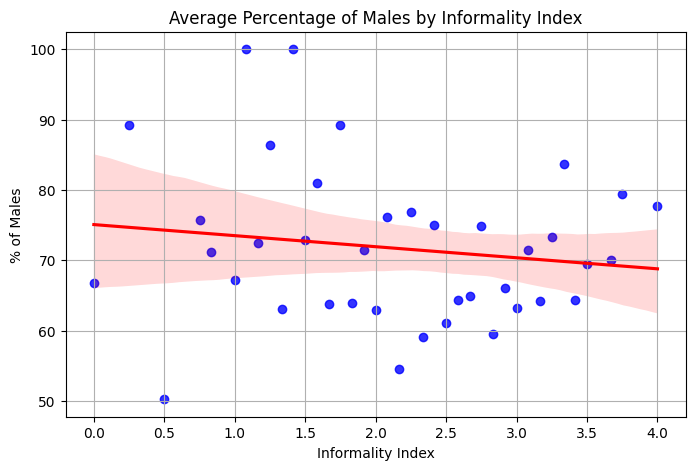

In [67]:
# Count the total number of observations for each value of II
total_counts_by_II = emicron['II'].value_counts()

# Count the number of males for each value of II
male_counts_by_II = emicron[emicron['P35'] == 1]['II'].value_counts()

# Calculate the percentage of males for each value of II
percentage_males_by_II = (male_counts_by_II / total_counts_by_II) * 100

# Create a DataFrame for seaborn
data = pd.DataFrame({'II': percentage_males_by_II.index, '% of Males': percentage_males_by_II.values})

# Plot the scatter plot with regression line and confidence interval
plt.figure(figsize=(8, 5))
sns.regplot(x='II', y='% of Males', data=data, ci=95, line_kws={"color":"red"}, scatter_kws={"color":"blue"})
plt.xlabel('Informality Index')
plt.ylabel('% of Males')
plt.title('Average Percentage of Males by Informality Index')
plt.grid(True)
plt.show()

In [69]:
weighted_total_counts_by_dept = emicron.groupby("dept_name")["F_EXP"].sum()

# Calculate the weighted number of rural firms for each department
weighted_rural_counts_by_dept = emicron[emicron['CLASE_TE'] == 2].groupby("dept_name")["F_EXP"].sum()

# Calculate the percentage of rural firms for each department with expansion factors
percentage_rural_by_dept = (weighted_rural_counts_by_dept / weighted_total_counts_by_dept) * 100

In [70]:
percentage_rural_by_dept

dept_name
Antioquia                                                   20.400710
Archipiélago de San Andrés, Providencia y Santa Catalina          NaN
Atlántico                                                    6.994073
Bogotá, D. C.                                                0.256463
Bolívar                                                     32.918174
Boyacá                                                      42.237886
Caldas                                                      23.870409
Caquetá                                                     39.625715
Cauca                                                       71.817836
Cesar                                                       21.574283
Chocó                                                       48.152449
Cundinamarca                                                24.731975
Córdoba                                                     57.008237
Huila                                                       44.955388
La Guajira

In [71]:
percentage_rural_by_dept.to_csv("/Users/henriquerodrigues/Downloads/rural.csv")

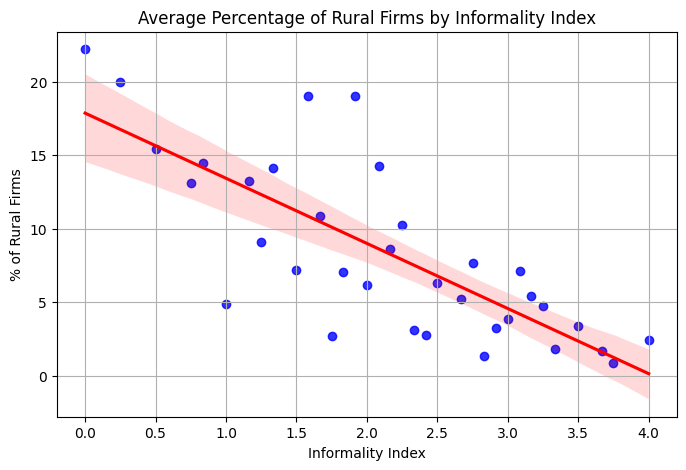

In [72]:
# Count the total number of observations for each value of II
total_counts_by_II = emicron['II'].value_counts()

# Count the number of males for each value of II
rural_counts_by_II = emicron[emicron['CLASE_TE'] == 2]['II'].value_counts()

# Calculate the percentage of males for each value of II
percentage_rural_by_II = (rural_counts_by_II / total_counts_by_II) * 100

# Create a DataFrame for seaborn
data = pd.DataFrame({'II': percentage_rural_by_II.index, '% of Rural Firms': percentage_rural_by_II.values})

# Plot the scatter plot with regression line and confidence interval
plt.figure(figsize=(8, 5))
sns.regplot(x='II', y='% of Rural Firms', data=data, ci=95, line_kws={"color":"red"}, scatter_kws={"color":"blue"})
plt.xlabel('Informality Index')
plt.ylabel('% of Rural Firms')
plt.title('Average Percentage of Rural Firms by Informality Index')
plt.grid(True)
plt.show()

In [59]:
emicron['dummy_unpaid'] = np.where(
    emicron['P3032_3'].isnull(),  # Check for null in P3032_3
    np.nan,  # Set to null if P3032_3 is null
    np.where(emicron['P3032_3'] == 0, 0, 1)  # Set to 0 if P3032_3 is 0, otherwise set to 1
)

In [87]:
filtered_emicron = emicron.dropna(subset=['dummy_unpaid'])

# Calculate the weighted number of firms with unpaid workers for each department
weighted_unpaid_counts_by_dept = (filtered_emicron["dummy_unpaid"] * filtered_emicron["F_EXP"]).groupby(filtered_emicron["dept_name"]).sum()

# Calculate the weighted total number of firms for each department
weighted_total_counts_by_dept = filtered_emicron.groupby("dept_name")["F_EXP"].sum()

# Calculate the percentage of firms with unpaid workers for each department with expansion factors
unpaid = (weighted_unpaid_counts_by_dept / weighted_total_counts_by_dept) * 100

In [88]:
unpaid.to_csv("/Users/henriquerodrigues/Downloads/unpaid.csv")

In [89]:
unpaid

dept_name
Antioquia                                                   15.353882
Archipiélago de San Andrés, Providencia y Santa Catalina     9.091110
Atlántico                                                   27.995687
Bogotá, D. C.                                               21.017870
Bolívar                                                     31.243286
Boyacá                                                      37.051154
Caldas                                                      22.546526
Caquetá                                                     60.927617
Cauca                                                       55.714463
Cesar                                                       29.851782
Chocó                                                       45.657606
Cundinamarca                                                21.870173
Córdoba                                                     52.856551
Huila                                                       50.442514
La Guajira

In [90]:
migracion = pd.read_stata("/Users/henriquerodrigues/Desktop/LSE/PP422/Project/Data/Modulos_GEIH/migration_geih-2022-clean.dta")
ocupados = pd.read_stata("/Users/henriquerodrigues/Desktop/LSE/PP422/Project/Data/Modulos_GEIH/occupied_geih-2022-clean.dta")
personas = pd.read_stata("/Users/henriquerodrigues/Desktop/LSE/PP422/Project/Data/Modulos_GEIH/household_geih-2022-clean.dta")

/var/folders/4h/c_6klx0d0bd723smcqr1l_3h0000gn/T/ipykernel_59552/777961713.py:1: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  migracion = pd.read_stata("/Users/henriquerodrigues/Desktop/LSE/PP422/Project/Data/Modulos_GEIH/migration_geih-2022-clean.dta")
/var/folders/4h/c_6klx0d0bd723smcqr1l_3h0000gn/T/ipykernel_59552/777961713.py:2: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  ocupados = pd.read_stata("/Users/henriquerodrigues/Desktop/LSE/PP422/Project/Data/Modulos_GEIH/occupied_geih-2022-clean.dta"

In [92]:
migracion["FEX_C18"]

0         1432.463323
1         1432.463323
2         1432.463323
3         1432.463323
4         1432.463323
             ...     
919454      25.636473
919455      25.167948
919456      25.167948
919457      25.167948
919458      25.167948
Name: FEX_C18, Length: 919459, dtype: float64

In [93]:
migracion["DPTO"].unique()

array(['08', '13', '25', '18', '15', '76', '63', '66', '05', '11', '17',
       '19', '20', '23', '41', '44', '50', '52', '54', '68', '70', '85',
       '86', '94', '95', '97', '73', '81', '88', '27', '47', '91', '99'],
      dtype=object)

In [108]:
department_codes = {
    5: 'ANTIOQUIA',
    8: 'ATLANTICO',
    11: 'BOGOTA',
    13: 'BOLIVAR',
    15: 'BOYACA',
    17: 'CALDAS',
    18: 'CAQUETA',
    19: 'CAUCA',
    20: 'CESAR',
    23: 'CORDOBA',
    25: 'CUNDINAMARCA',
    27: 'CHOCO',
    41: 'HUILA',
    44: 'LA GUAJIRA',
    47: 'MAGDALENA',
    50: 'META',
    52: 'NARIÑO',
    54: 'NORTE DE SANTANDER',
    63: 'QUINDIO',
    66: 'RISALRALDA',
    68: 'SANTANDER',
    70: 'SUCRE',
    73: 'TOLIMA',
    76: 'VALLE',
    81: 'ARAUCA',
    85: 'CASANARE',
    86: 'PUTUMAYO',
    88: 'SAN ANDRES',
    91: 'AMAZONAS',
    94: 'GUAINIA',
    95: 'GUAVIARE',
    97: 'VAUPES',
    99: 'VICHADA'
}


In [115]:
migracion["DPTO"] = migracion["DPTO"].astype(int)

In [116]:
migracion['dept_name'] = migracion['DPTO'].map(department_codes)

In [118]:
migracion[["DPTO","dept_name"]]

,DPTO,dept_name
0,8,ATLANTICO
1,8,ATLANTICO
2,8,ATLANTICO
3,8,ATLANTICO
4,8,ATLANTICO
...,...,...
919454,99,VICHADA
919455,99,VICHADA
919456,99,VICHADA
919457,99,VICHADA


In [119]:
migracion['migrant_dummy'] = np.where(migracion['P3373'] == 3, 1, 0)

In [120]:
migrants = migracion.groupby("dept_name")["migrant_dummy"].mean()*100

In [121]:
migrants.to_csv("/Users/henriquerodrigues/Downloads/migrants.csv")

In [122]:
migrants

dept_name
AMAZONAS               1.376488
ANTIOQUIA              5.463654
ARAUCA                18.459858
ATLANTICO              7.224156
BOGOTA                 5.526964
BOLIVAR                5.663978
BOYACA                 2.744392
CALDAS                 2.333445
CAQUETA                0.907928
CASANARE               9.025760
CAUCA                  2.618658
CESAR                  6.720840
CHOCO                  1.074014
CORDOBA                1.716297
CUNDINAMARCA           5.299844
GUAINIA               14.198141
GUAVIARE               3.625783
HUILA                  1.751527
LA GUAJIRA            12.588545
MAGDALENA              7.866673
META                   4.247877
NARIÑO                 1.385936
NORTE DE SANTANDER    13.620726
PUTUMAYO               5.486344
QUINDIO                4.156354
RISALRALDA             5.017345
SAN ANDRES             0.910760
SANTANDER              6.445385
SUCRE                  2.706175
TOLIMA                 2.377439
VALLE                  4.80584

In [124]:
migrants_df = migracion[migracion['P3373'] == 3]

# Step 2: Group the filtered dataframe by department
grouped_migrants = migrants_df.groupby('dept_name')

# Step 3: Count the number of migrants from Venezuela (P3373S3 = 862) for each department
migrants_from_venezuela_by_dept = grouped_migrants['P3373S3'].apply(lambda x: (x == 862).sum())

# Step 4: Calculate the percentage for each department
total_migrants_by_dept = grouped_migrants.size()
percentage_from_venezuela_by_dept = (migrants_from_venezuela_by_dept / total_migrants_by_dept) * 100

# Print or use the resulting percentages
print("Percentage of migrants from Venezuela by department:")
print(percentage_from_venezuela_by_dept)

Percentage of migrants from Venezuela by department:
dept_name
AMAZONAS               5.405405
ANTIOQUIA             93.598616
ARAUCA                98.619329
ATLANTICO             97.846890
BOGOTA                89.704918
BOLIVAR               96.929638
BOYACA                94.272076
CALDAS                87.975334
CAQUETA               89.788732
CASANARE              98.927039
CAUCA                 91.627358
CESAR                 98.341336
CHOCO                 94.567901
CORDOBA               93.230174
CUNDINAMARCA          95.804989
GUAINIA               97.632312
GUAVIARE              97.530864
HUILA                 91.771020
LA GUAJIRA            99.454744
MAGDALENA             96.916158
META                  95.152722
NARIÑO                72.537879
NORTE DE SANTANDER    99.455994
PUTUMAYO              98.253275
QUINDIO               89.615105
RISALRALDA            87.595323
SAN ANDRES            26.356589
SANTANDER             97.293396
SUCRE                 97.823937
TOLIMA   

In [125]:
percentage_from_venezuela_by_dept.to_csv("/Users/henriquerodrigues/Downloads/venezuelans.csv")

In [127]:
ocupados[["P6440", "P6450"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382461 entries, 0 to 382460
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   P6440   382461 non-null  float64
 1   P6450   223862 non-null  float64
dtypes: float64(2)
memory usage: 5.8 MB


In [128]:
ocupados["P6440"].value_counts()

P6440
1.0    223862
2.0    158599
Name: count, dtype: int64

In [129]:
ocupados["P7170S1"].value_counts()

P7170S1
1.0    324385
2.0     58076
Name: count, dtype: int64

In [131]:
ocupados["P514"].value_counts()

P514
1.0    257487
2.0    124974
Name: count, dtype: int64

In [132]:
merged = pd.read_csv("/Users/henriquerodrigues/Desktop/LSE/PP422/Project/Data/emicron_geih_merged.csv")

In [147]:
department = {
    5: "Antioquia",
    8: "Atlántico",
    11: "Bogotá, D. C.",
    13: "Bolívar",
    15: "Boyacá",
    17: "Caldas",
    18: "Caquetá",
    19: "Cauca",
    20: "Cesar",
    23: "Córdoba",
    25: "Cundinamarca",
    27: "Chocó",
    41: "Huila",
    44: "La Guajira",
    47: "Magdalena",
    50: "Meta",
    52: "Nariño",
    54: "Norte De Santander",
    63: "Quindío",
    66: "Risaralda",
    68: "Santander",
    70: "Sucre",
    73: "Tolima",
    76: "Valle Del Cauca",
    88: "Archipiélago de San Andrés, Providencia y Santa Catalina"
}

In [148]:
merged['dept_name'] = merged['COD_DEPTO'].map(department)

In [138]:
merged["P6440"].value_counts()

P6440
2.0    77538
1.0     3215
Name: count, dtype: int64

In [139]:
merged["P7170S1"].value_counts()

P7170S1
1.0    68358
2.0    12395
Name: count, dtype: int64

In [140]:
merged["P514"].value_counts()

P514
1.0    50276
2.0    30477
Name: count, dtype: int64

In [143]:
merged["P3373"].value_counts()

P3373
1.0    43156
2.0    33779
3.0     3818
Name: count, dtype: int64

In [146]:
merged['migrant_owner'] = np.where(merged['P3373'] == 3, 1, np.where(merged['P3373'].isin([1, 2]), 0, np.nan))

In [151]:
filtered_merged = merged.dropna(subset=['migrant_owner'])

# Calculate the weighted number of firms with unpaid workers for each department
weighted_mig_counts_by_dept = (filtered_merged["migrant_owner"] * filtered_merged["F_EXP"]).groupby(filtered_merged["dept_name"]).sum()

# Calculate the weighted total number of firms for each department
weighted_total_counts_by_dept = filtered_merged.groupby("dept_name")["F_EXP"].sum()

# Calculate the percentage of firms with unpaid workers for each department with expansion factors
migrant_owners = (weighted_mig_counts_by_dept / weighted_total_counts_by_dept) * 100

In [152]:
migrant_owners

dept_name
Antioquia                                                    4.652195
Archipiélago de San Andrés, Providencia y Santa Catalina     1.430695
Atlántico                                                    7.050196
Bogotá, D. C.                                                6.098383
Bolívar                                                      4.020055
Boyacá                                                       1.612020
Caldas                                                       1.732402
Caquetá                                                      0.650860
Cauca                                                        0.587389
Cesar                                                        4.586804
Chocó                                                        1.047322
Cundinamarca                                                 4.509657
Córdoba                                                      1.025080
Huila                                                        0.964675
La Guajira

In [153]:
migrant_owners.to_csv("/Users/henriquerodrigues/Downloads/mig_owners.csv")

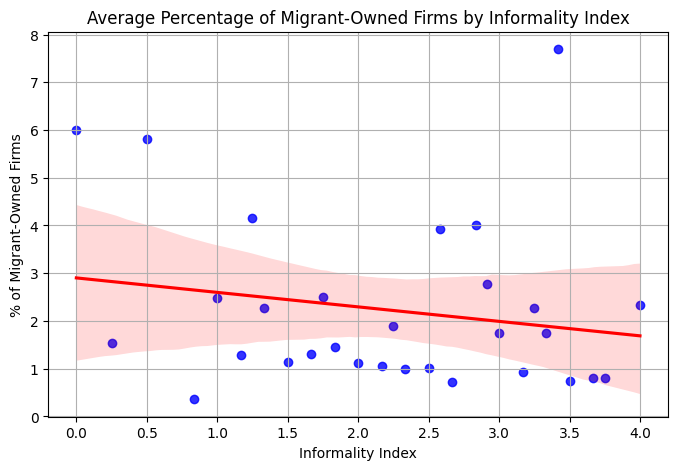

In [155]:
# Count the total number of observations for each value of II
total_counts_by_II = merged['II'].value_counts()

# Count the number of males for each value of II
owner_counts_by_II = merged[merged['P3373'] == 3]['II'].value_counts()

# Calculate the percentage of males for each value of II
percentage_onwer_by_II = (owner_counts_by_II / total_counts_by_II) * 100

# Create a DataFrame for seaborn
data = pd.DataFrame({'II': percentage_onwer_by_II.index, '% of Migrant-Owned Firms': percentage_onwer_by_II.values})

# Plot the scatter plot with regression line and confidence interval
plt.figure(figsize=(8, 5))
sns.regplot(x='II', y='% of Migrant-Owned Firms', data=data, ci=95, line_kws={"color":"red"}, scatter_kws={"color":"blue"})
plt.xlabel('Informality Index')
plt.ylabel('% of Migrant-Owned Firms')
plt.title('Average Percentage of Migrant-Owned Firms by Informality Index')
plt.grid(True)
plt.show()

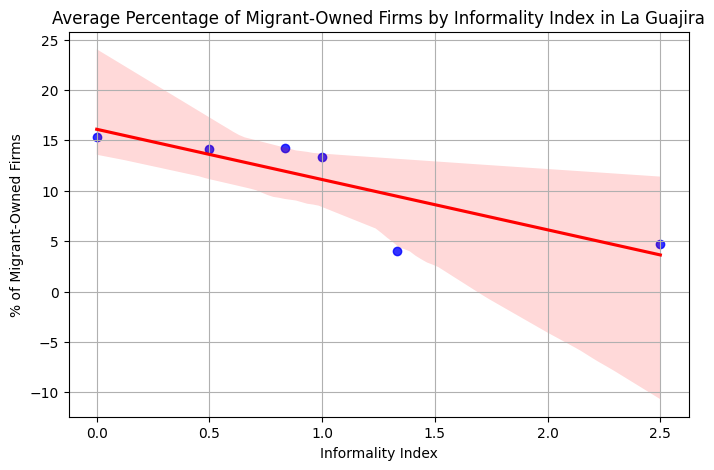

In [162]:
f = merged[merged["dept_name"]=="La Guajira"]

# Count the total number of observations for each value of II
total_counts_by_II = f['II'].value_counts()

# Count the number of males for each value of II
owner_counts_by_II = f[f['P3373'] == 3]['II'].value_counts()

# Calculate the percentage of males for each value of II
percentage_onwer_by_II = (owner_counts_by_II / total_counts_by_II) * 100

# Create a DataFrame for seaborn
data = pd.DataFrame({'II': percentage_onwer_by_II.index, '% of Migrant-Owned Firms': percentage_onwer_by_II.values})

# Plot the scatter plot with regression line and confidence interval
plt.figure(figsize=(8, 5))
sns.regplot(x='II', y='% of Migrant-Owned Firms', data=data, ci=95, line_kws={"color":"red"}, scatter_kws={"color":"blue"})
plt.xlabel('Informality Index')
plt.ylabel('% of Migrant-Owned Firms')
plt.title('Average Percentage of Migrant-Owned Firms by Informality Index in La Guajira')
plt.grid(True)
plt.show()

In [168]:
merged["dummy_sat"]=np.where(merged["P7170S1"]==1, 1, 0)

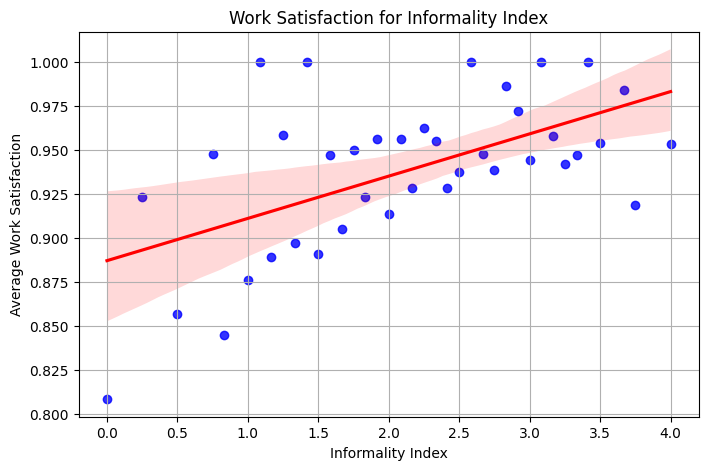

In [179]:
# Group the DataFrame by II and calculate the average of the dummy variable
average_dummy_by_II = merged.groupby('II')['dummy_sat'].mean().reset_index()

# Create a scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.regplot(x='II', y='dummy_sat', data=average_dummy_by_II, scatter=True, ci=95, line_kws={"color":"red"}, scatter_kws={"color":"blue"})
plt.xlabel('Informality Index')
plt.ylabel('Average Work Satisfaction')
plt.title('Work Satisfaction for Informality Index')
plt.grid(True)
plt.show()

In [185]:
reasons = {
    1:"No other alternative",
    2:"Business Opportunity",
    3:"Family Tradition",
    4:"Income supplement",
    5:"Career",
    6:"Not enough experience/education",
    7:"Other"
}

In [188]:
merged["P3051"]=merged["P3051"].astype(int).map(reasons)

In [210]:
dF = pd.DataFrame(round(merged.groupby("P3051")["dummy_sat"].mean()*100, 2))
dF = dF.rename(columns={'dummy_sat': '% of Satisfied Owners'})
dF.index.name = 'Reason for Starting Business'

In [211]:
dF

,% of Satisfied Owners
Reason for Starting Business,
Business Opportunity,87.46
Career,90.98
Family Tradition,89.29
Income supplement,83.79
No other alternative,79.23
Not enough experience/education,81.99
Other,90.69


In [223]:
satisfaction = merged.groupby("dept_name")["dummy_sat"].mean()*100

In [234]:
weighted_sat_counts_by_dept = (merged["dummy_sat"] * merged["F_EXP"]).groupby(merged["dept_name"]).sum()

# Calculate the weighted total number of firms for each department
weighted_total_counts_by_dept = merged.groupby("dept_name")["F_EXP"].sum()

# Calculate the percentage of firms with unpaid workers for each department with expansion factors
satisfaction = (weighted_sat_counts_by_dept / weighted_total_counts_by_dept) * 100

In [235]:
satisfaction

dept_name
Antioquia                                                   90.976172
Archipiélago de San Andrés, Providencia y Santa Catalina    98.173247
Atlántico                                                   83.773007
Bogotá, D. C.                                               86.646447
Bolívar                                                     70.006870
Boyacá                                                      87.163136
Caldas                                                      94.366143
Caquetá                                                     89.018888
Cauca                                                       87.063875
Cesar                                                       80.166082
Chocó                                                       93.500535
Cundinamarca                                                88.947396
Córdoba                                                     77.630756
Huila                                                       87.423838
La Guajira

In [236]:
satisfaction.to_csv("/Users/henriquerodrigues/Downloads/satis.csv")

In [212]:
merged["dummy_stab"]=np.where(merged["P514"]==1, 1, 0)

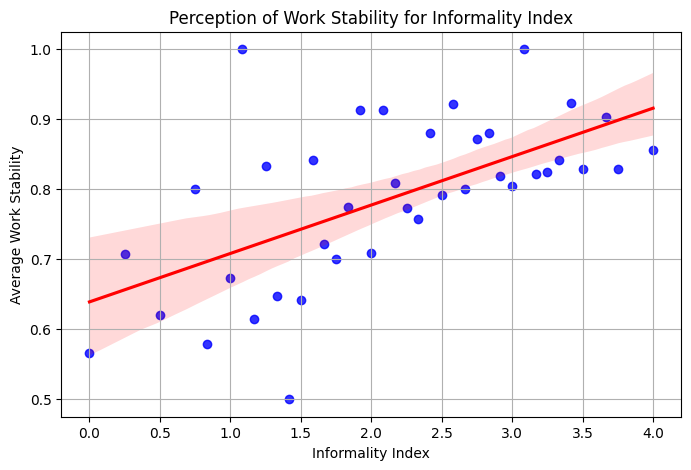

In [214]:
# Group the DataFrame by II and calculate the average of the dummy variable
average_dummy_by_II = merged.groupby('II')['dummy_stab'].mean().reset_index()

# Create a scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.regplot(x='II', y='dummy_stab', data=average_dummy_by_II, scatter=True, ci=95, line_kws={"color":"red"}, scatter_kws={"color":"blue"})
plt.xlabel('Informality Index')
plt.ylabel('Average Work Stability')
plt.title('Perception of Work Stability for Informality Index')
plt.grid(True)
plt.show()

In [219]:
dF = pd.DataFrame(round(merged.groupby("P3051")["dummy_stab"].mean()*100, 2))
dF = dF.rename(columns={'dummy_stab': '% of Owners Perceiving Stable Jobs'})
dF.index.name = 'Reason for Starting Business'

In [220]:
dF

,% of Owners Perceiving Stable Jobs
Reason for Starting Business,
Business Opportunity,67.76
Career,66.31
Family Tradition,67.11
Income supplement,58.87
No other alternative,55.99
Not enough experience/education,56.76
Other,65.80


In [231]:
weighted_stab_counts_by_dept = (merged["dummy_stab"] * merged["F_EXP"]).groupby(merged["dept_name"]).sum()

# Calculate the weighted total number of firms for each department
weighted_total_counts_by_dept = merged.groupby("dept_name")["F_EXP"].sum()

# Calculate the percentage of firms with unpaid workers for each department with expansion factors
stability = (weighted_stab_counts_by_dept / weighted_total_counts_by_dept) * 100

In [232]:
stability

dept_name
Antioquia                                                   73.328169
Archipiélago de San Andrés, Providencia y Santa Catalina    88.608910
Atlántico                                                   62.102640
Bogotá, D. C.                                               66.281927
Bolívar                                                     63.784255
Boyacá                                                      51.249542
Caldas                                                      84.758663
Caquetá                                                     69.159801
Cauca                                                       66.295768
Cesar                                                       57.579775
Chocó                                                       80.556850
Cundinamarca                                                60.930895
Córdoba                                                     51.893591
Huila                                                       64.633243
La Guajira

In [233]:
stability.to_csv("/Users/henriquerodrigues/Downloads/stab.csv")

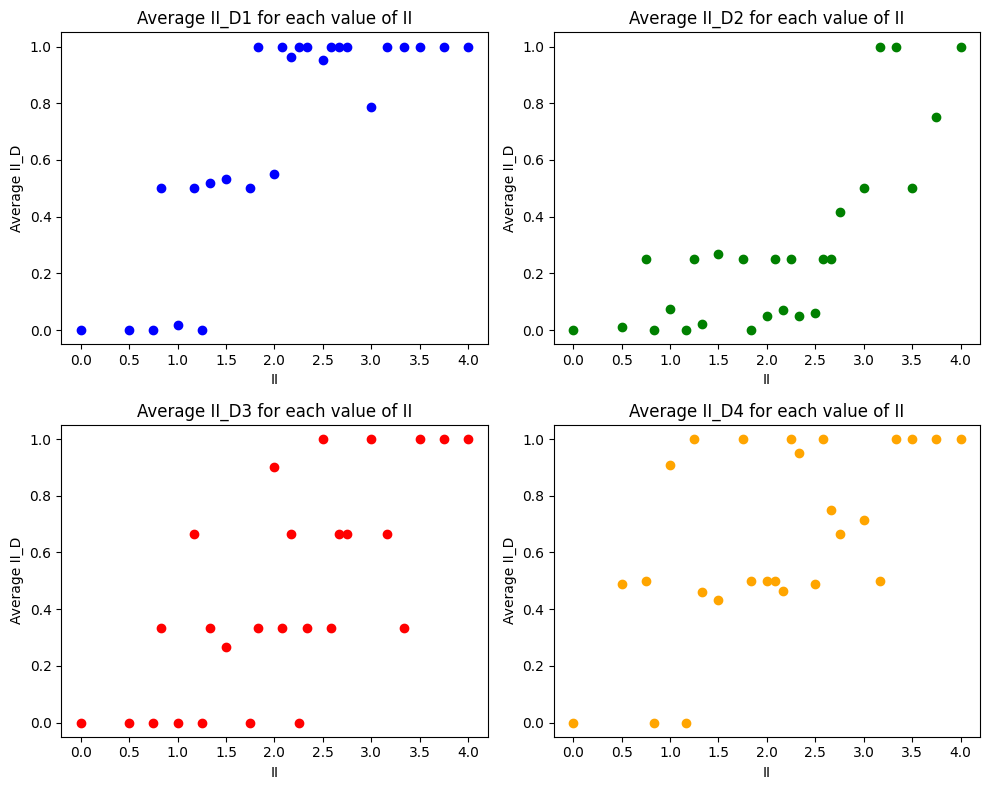

In [237]:
# Calculate the average of each II_D variable grouped by II
average_by_II = merged[merged["dept_name"]=="La Guajira"].groupby('II')[['II_D1', 'II_D2', 'II_D3', 'II_D4']].mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Define colors for each II_D variable
colors = ['blue', 'green', 'red', 'orange']

# Plot each II_D variable on a separate subplot with different colors
for i, (ii_d, color) in enumerate(zip(average_by_II.columns, colors)):
    axs[i].scatter(average_by_II.index, average_by_II[ii_d], color=color)
    axs[i].set_title(f'Average {ii_d} for each value of II')
    axs[i].set_xlabel('II')
    axs[i].set_ylabel('Average II_D')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [244]:
total_firms = len(merged[merged["migrant_owner"] == 1])

# Calculate the count of firms for each reason for starting business
count_by_reason = merged[merged["migrant_owner"] == 1]["P3051"].value_counts()

# Convert the count to percentages
percent_by_reason = round((count_by_reason / total_firms) * 100,2)

# Create a DataFrame with the percentages
df = pd.DataFrame(percent_by_reason).rename(columns={'count': '% of Migrant-Owned Firms'})

# Rename the index
df.index.name = 'Reason for Starting Business'

In [245]:
df

,% of Migrant-Owned Firms
Reason for Starting Business,
No other alternative,54.22
Business Opportunity,25.25
Career,11.24
Income supplement,5.87
Family Tradition,2.57
Not enough experience/education,0.52
Other,0.34
